<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/deci_tree_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import  load_breast_cancer
dataset = load_breast_cancer()

In [3]:
t = dataset.target
x = dataset.data

In [4]:
x.shape, t.shape

((569, 30), (569,))

In [5]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=1)

In [6]:
x_train_val.shape, x_test.shape

((455, 30), (114, 30))

In [7]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=1)

In [8]:
x_train.shape, x_val.shape, x_test.shape

((318, 30), (137, 30), (114, 30))

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=0)
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
print(f'train score: {dtree.score(x_train, t_train)}')
print(f'val score: {dtree.score(x_val, t_val)}')
print(f'test score: {dtree.score(x_test, t_test)}')

train score: 0.9308176100628931
val score: 0.9562043795620438
test score: 0.9298245614035088


In [ ]:
# グリッドサーチ、ハイパーパラメータの調整方法
'''
グリッドサーチ使用するにあたって用意するパラメーター
　・estimator : 学習に使用するモデル
　・param_grid : ハイパーパラメーターを探索する範囲, (辞書型で、パラメータの名前をキーに、探索範囲ををバリューに格納)
　・cv : k-分割公差検証のkの値
'''

In [11]:
from sklearn.model_selection import GridSearchCV

In [17]:
estimator = DecisionTreeClassifier(random_state = 0)
param_grid = [{'max_depth' : [5,10,15,20,25,30,35,40,45,50], 'min_samples_split':[5,10,15,20,25,30]}]
cv =5

In [18]:
tuned_model = GridSearchCV(estimator = estimator, param_grid=param_grid, cv=cv, return_train_score=False)
tuned_model.fit(x_train_val, t_train_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                          'min_samples_split': 

In [20]:
# 学習結(果はcv_resultsに格納されている
# pd.DataFrame(tuned_model.cv_results_).T
df = pd.DataFrame(tuned_model.cv_results_)
df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006398,0.002264,0.000539,0.000224,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.967033,0.912088,0.912088,0.956044,0.967033,0.942857,0.025441,11
1,0.004725,0.000271,0.000380,0.000019,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.967033,0.912088,0.923077,0.956044,0.967033,0.945055,0.023051,1
2,0.004577,0.000222,0.000360,0.000016,5,15,"{'max_depth': 5, 'min_samples_split': 15}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21
3,0.004573,0.000253,0.000360,0.000020,5,20,"{'max_depth': 5, 'min_samples_split': 20}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21
4,0.004486,0.000194,0.000347,0.000016,5,25,"{'max_depth': 5, 'min_samples_split': 25}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21
5,0.004396,0.000223,0.000362,0.000028,5,30,"{'max_depth': 5, 'min_samples_split': 30}",0.912088,0.901099,0.934066,0.945055,0.901099,0.918681,0.017855,51
6,0.004572,0.000221,0.000361,0.000014,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.967033,0.912088,0.912088,0.956044,0.956044,0.940659,0.023671,12
7,0.004519,0.000202,0.000364,0.000024,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.967033,0.912088,0.923077,0.956044,0.967033,0.945055,0.023051,1
8,0.004437,0.000213,0.000341,0.000010,10,15,"{'max_depth': 10, 'min_samples_split': 15}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21
9,0.004618,0.000494,0.000407,0.000122,10,20,"{'max_depth': 10, 'min_samples_split': 20}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21


In [21]:
df['mean_test_score']

0     0.942857
1     0.945055
2     0.925275
3     0.925275
4     0.925275
5     0.918681
6     0.940659
7     0.945055
8     0.925275
9     0.925275
10    0.925275
11    0.918681
12    0.940659
13    0.945055
14    0.925275
15    0.925275
16    0.925275
17    0.918681
18    0.940659
19    0.945055
20    0.925275
21    0.925275
22    0.925275
23    0.918681
24    0.940659
25    0.945055
26    0.925275
27    0.925275
28    0.925275
29    0.918681
30    0.940659
31    0.945055
32    0.925275
33    0.925275
34    0.925275
35    0.918681
36    0.940659
37    0.945055
38    0.925275
39    0.925275
40    0.925275
41    0.918681
42    0.940659
43    0.945055
44    0.925275
45    0.925275
46    0.925275
47    0.918681
48    0.940659
49    0.945055
50    0.925275
51    0.925275
52    0.925275
53    0.918681
54    0.940659
55    0.945055
56    0.925275
57    0.925275
58    0.925275
59    0.918681
Name: mean_test_score, dtype: float64

In [22]:
tuned_model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [23]:
best_model = tuned_model.best_estimator_

In [24]:
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

0.9934065934065934
0.956140350877193


In [25]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

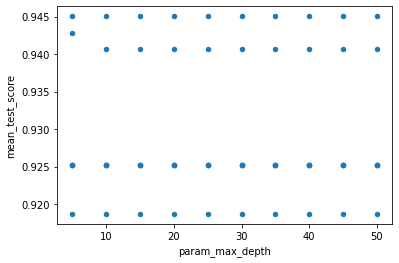

In [26]:
df.plot.scatter('param_max_depth', 'mean_test_score')

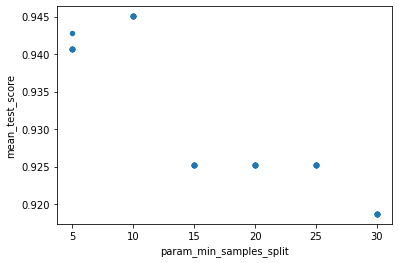

In [27]:
df.plot.scatter('param_min_samples_split', 'mean_test_score')

In [ ]:
# グリッドサーチ(for文で構築)

In [ ]:
import numpy as np
max_depths = np.array([5,10,15,20,25,30,35,40,45,50])
min_samples_splits = np.array([5,10,15,20,25,30])

In [ ]:
train_score = []
val_score = []
test_score = []
best_score = 0

In [ ]:
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        dtree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        dtree.fit(x_train, t_train)
        
        train_score.append((dtree.score(x_train, t_train)))
        val_score.append((dtree.score(x_val, t_val)))
        test_score.append((dtree.score(x_test, t_test)))
        test_scores = dtree.score(x_test, t_test)


        if test_scores > best_score:
            best_score = test_scores
            best_parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split}

print('Best score : {:.4f}'.format(best_score))
print('Best parameters : {}'.format(best_parameters))

Best score : 0.9298
Best parameters : {'max_depth': 5, 'min_samples_split': 15}
